<a href="https://colab.research.google.com/github/Suhanii054/DEEP-LEARNING/blob/main/DL_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


In [3]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CNN expects channel dimension
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

print("CNN Train shape:", x_train_cnn.shape)
print("CNN Test shape:", x_test_cnn.shape)


CNN Train shape: (60000, 28, 28, 1)
CNN Test shape: (10000, 28, 28, 1)


In [4]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# CNN expects channel dimension
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_test.reshape(-1, 28, 28, 1)

print("CNN Train shape:", x_train_cnn.shape)
print("CNN Test shape:", x_test_cnn.shape)


CNN Train shape: (60000, 28, 28, 1)
CNN Test shape: (10000, 28, 28, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

def build_cnn_model(activation="relu", optimizer="adam"):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)),
        Conv2D(64, (3,3), activation=activation),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation=activation),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [6]:
cnn_relu_adam = build_cnn_model(
    activation="relu",
    optimizer=Adam()
)

history_cnn_relu_adam = cnn_relu_adam.fit(
    x_train_cnn, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 168s 353ms/step - accuracy: 0.5595 - loss: 1.3523 - val_accuracy: 0.9116 - val_loss: 0.3039
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 165s 352ms/step - accuracy: 0.9089 - loss: 0.3038 - val_accuracy: 0.9331 - val_loss: 0.2261
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 347ms/step - accuracy: 0.9282 - loss: 0.2369 - val_accuracy: 0.9427 - val_loss: 0.1920
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 208s 359ms/step - accuracy: 0.9429 - loss: 0.1953 - val_accuracy: 0.9525 - val_loss: 0.1644
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 355ms/step - accuracy: 0.9502 - loss: 0.1655 - val_accuracy: 0.9593 - val_loss: 0.1379
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 337ms/step - accuracy: 0.9558 - loss: 0.1452 - val_accuracy: 0.9597 - val_loss: 0.1319
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 336ms/step - accuracy: 0.9588 - loss: 0.1365 - val_accuracy: 0.9636 - val_loss: 0.1206
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 334ms/step - accuracy: 0.9644 -

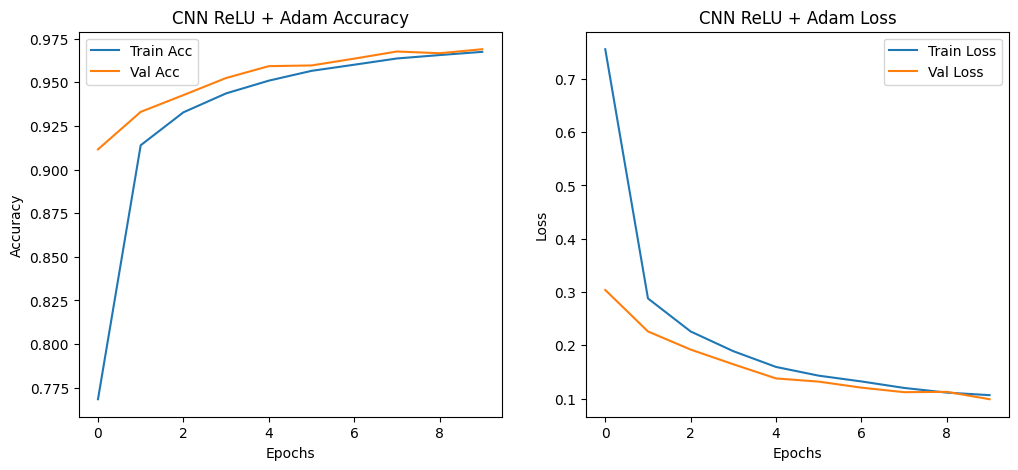

In [7]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_cnn_relu_adam.history['accuracy'], label='Train Acc')
plt.plot(history_cnn_relu_adam.history['val_accuracy'], label='Val Acc')
plt.title("CNN ReLU + Adam Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_cnn_relu_adam.history['loss'], label='Train Loss')
plt.plot(history_cnn_relu_adam.history['val_loss'], label='Val Loss')
plt.title("CNN ReLU + Adam Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [9]:
def build_cnn_model_light(activation="relu", optimizer="adam"):
    model = Sequential([
        Conv2D(16, (3,3), activation=activation, input_shape=(28,28,1)),
        Conv2D(32, (3,3), activation=activation),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation=activation),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [10]:
cnn_sigmoid = build_cnn_model_light(
    activation="sigmoid",
    optimizer=Adam()
)

history_cnn_sigmoid = cnn_sigmoid.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 69s 287ms/step - accuracy: 0.1023 - loss: 2.3621 - val_accuracy: 0.1135 - val_loss: 2.3025
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 289ms/step - accuracy: 0.1056 - loss: 2.3037 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 290ms/step - accuracy: 0.1060 - loss: 2.3033 - val_accuracy: 0.1135 - val_loss: 2.3055
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 284ms/step - accuracy: 0.1082 - loss: 2.3033 - val_accuracy: 0.0980 - val_loss: 2.3038
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 287ms/step - accuracy: 0.1056 - loss: 2.3040 - val_accuracy: 0.0980 - val_loss: 2.3056


In [11]:
cnn_tanh = build_cnn_model_light(
    activation="tanh",
    optimizer=Adam()
)

history_cnn_tanh = cnn_tanh.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 279ms/step - accuracy: 0.5837 - loss: 1.3531 - val_accuracy: 0.9129 - val_loss: 0.2928
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 280ms/step - accuracy: 0.9139 - loss: 0.2902 - val_accuracy: 0.9351 - val_loss: 0.2163
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 281ms/step - accuracy: 0.9369 - loss: 0.2127 - val_accuracy: 0.9539 - val_loss: 0.1581
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 279ms/step - accuracy: 0.9524 - loss: 0.1595 - val_accuracy: 0.9612 - val_loss: 0.1320
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 287ms/step - accuracy: 0.9613 - loss: 0.1293 - val_accuracy: 0.9658 - val_loss: 0.1132


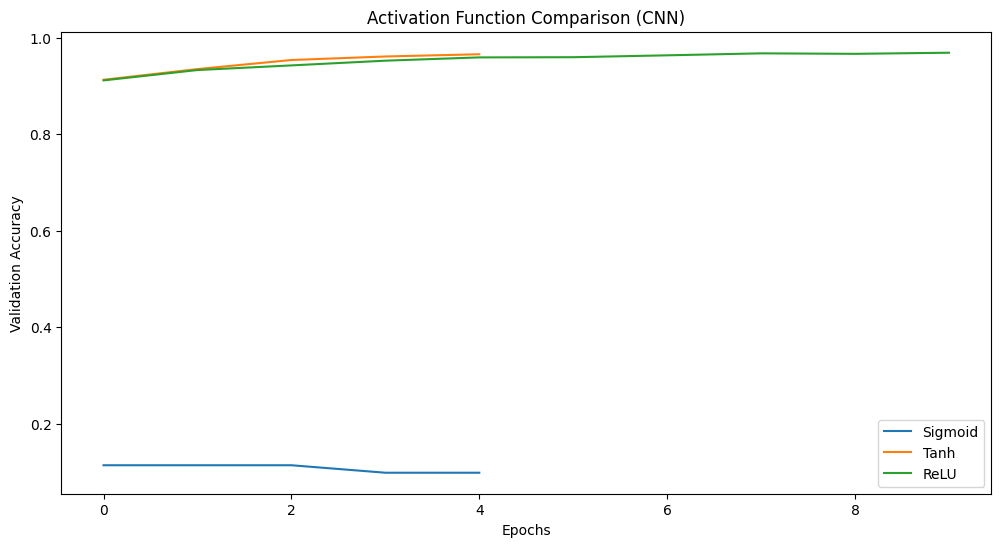

In [12]:
plt.figure(figsize=(12,6))

plt.plot(history_cnn_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_cnn_tanh.history['val_accuracy'], label='Tanh')
plt.plot(history_cnn_relu_adam.history['val_accuracy'], label='ReLU')

plt.title("Activation Function Comparison (CNN)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# Task **2**

In [13]:
cnn_relu_sgd = build_cnn_model_light(
    activation="relu",
    optimizer=SGD(learning_rate=0.01)
)

history_relu_sgd = cnn_relu_sgd.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 286ms/step - accuracy: 0.1187 - loss: 2.3022 - val_accuracy: 0.1135 - val_loss: 2.3015
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 285ms/step - accuracy: 0.1118 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 282ms/step - accuracy: 0.1102 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 285ms/step - accuracy: 0.1132 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 282ms/step - accuracy: 0.1123 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.3007


In [14]:
cnn_relu_sgd_momentum = build_cnn_model_light(
    activation="relu",
    optimizer=SGD(learning_rate=0.01, momentum=0.9)
)

history_relu_sgd_m = cnn_relu_sgd_momentum.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 282ms/step - accuracy: 0.1143 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 281ms/step - accuracy: 0.1138 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 285ms/step - accuracy: 0.1137 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 284ms/step - accuracy: 0.1089 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 279ms/step - accuracy: 0.1114 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3008


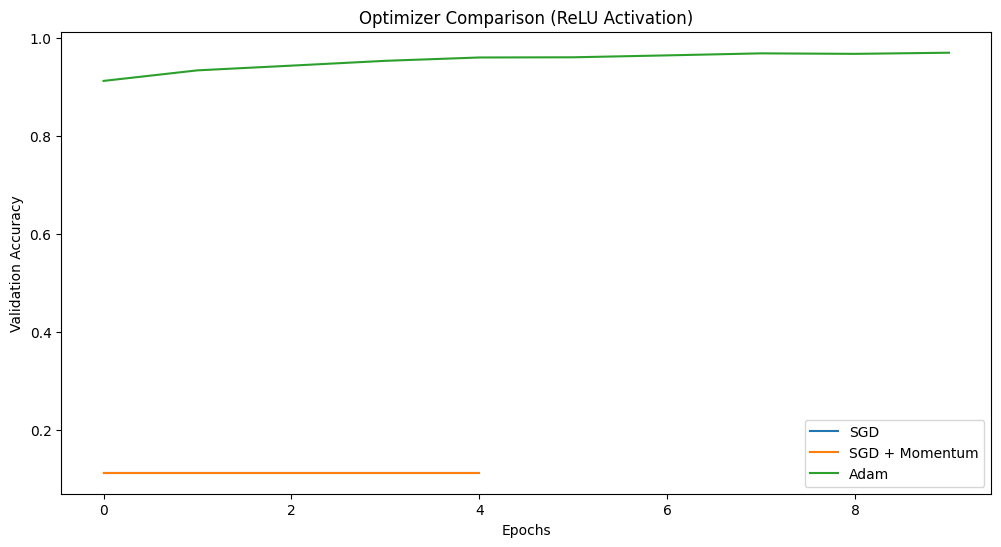

In [15]:
plt.figure(figsize=(12,6))

plt.plot(history_relu_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_relu_sgd_m.history['val_accuracy'], label='SGD + Momentum')
plt.plot(history_cnn_relu_adam.history['val_accuracy'], label='Adam')

plt.title("Optimizer Comparison (ReLU Activation)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **Task 3**

In [16]:
from tensorflow.keras.layers import BatchNormalization

def cnn_no_bn_no_dropout():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [17]:
def cnn_dropout_only():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.1),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [18]:
def cnn_bn_dropout():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [19]:
model_no_reg = cnn_no_bn_no_dropout()

history_no_reg = model_no_reg.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 270ms/step - accuracy: 0.4241 - loss: 1.7180 - val_accuracy: 0.8931 - val_loss: 0.3625
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 266ms/step - accuracy: 0.8918 - loss: 0.3609 - val_accuracy: 0.9156 - val_loss: 0.2872
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 261ms/step - accuracy: 0.9170 - loss: 0.2808 - val_accuracy: 0.9295 - val_loss: 0.2393
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 268ms/step - accuracy: 0.9284 - loss: 0.2417 - val_accuracy: 0.9414 - val_loss: 0.2022
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 260ms/step - accuracy: 0.9392 - loss: 0.2057 - val_accuracy: 0.9481 - val_loss: 0.1718


In [21]:
model_dropout = cnn_dropout_only()

history_dropout = model_dropout.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 69s 286ms/step - accuracy: 0.4561 - loss: 1.6550 - val_accuracy: 0.8991 - val_loss: 0.3504
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 281ms/step - accuracy: 0.9000 - loss: 0.3385 - val_accuracy: 0.9224 - val_loss: 0.2690
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 282ms/step - accuracy: 0.9197 - loss: 0.2727 - val_accuracy: 0.9326 - val_loss: 0.2188
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 285ms/step - accuracy: 0.9343 - loss: 0.2198 - val_accuracy: 0.9435 - val_loss: 0.1829
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 278ms/step - accuracy: 0.9466 - loss: 0.1814 - val_accuracy: 0.9539 - val_loss: 0.1530


In [20]:
model_bn_dropout = cnn_bn_dropout()

history_bn_dropout = model_bn_dropout.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test_cnn, y_test),
    verbose=1
)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 441ms/step - accuracy: 0.9002 - loss: 0.3338 - val_accuracy: 0.1135 - val_loss: 3.9156
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 431ms/step - accuracy: 0.9848 - loss: 0.0520 - val_accuracy: 0.1135 - val_loss: 5.2532
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 458ms/step - accuracy: 0.9912 - loss: 0.0312 - val_accuracy: 0.9071 - val_loss: 0.3110
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 453ms/step - accuracy: 0.9932 - loss: 0.0232 - val_accuracy: 0.9844 - val_loss: 0.0494
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9891 - val_loss: 0.0380


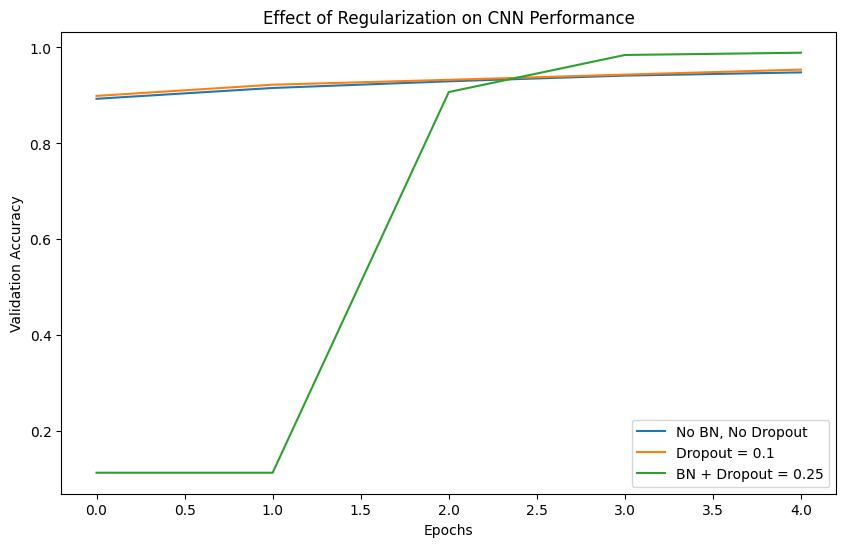

In [22]:
plt.figure(figsize=(10,6))

plt.plot(history_no_reg.history['val_accuracy'], label='No BN, No Dropout')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout = 0.1')
plt.plot(history_bn_dropout.history['val_accuracy'], label='BN + Dropout = 0.25')

plt.title("Effect of Regularization on CNN Performance")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
